# NBA Team Pattern Analysis - Data Cleaning

This notebook cleans and preprocesses NBA data from Kaggle to prepare it for unsupervised learning analysis. The focus is on creating high-quality, standardized datasets that will be used for clustering analysis, dimensionality reduction, and pattern discovery.

## Data Sources and Cleaning Goals

1. **NBA/ABA/BAA Stats (sumitrodatta)**
   - **Player Season Info**: Individual player stats per season
     - Standardize team names
     - Filter for NBA-only data
     - Add conference information
     - Handle missing values
     - Ensure numeric features are properly scaled for clustering
   
   - **Team Stats Per Game**: Team performance metrics
     - Normalize team names
     - Add conference mappings
     - Ensure consistent stats
     - Prepare features for dimensionality reduction

2. **NBA Injury Stats (loganlauton)**
   - Historical injury data (1951-2023)
     - Remove data before 2024
     - Normalize team names
     - Remove missing values
     - Add conference mappings
     - Create yearly injury summaries by team
     - Prepare injury patterns for clustering analysis

## Data Quality Considerations for Unsupervised Learning

1. **Feature Scaling**
   - Ensure all numeric features are on similar scales
   - Prepare data for distance-based algorithms (k-means, hierarchical clustering)

2. **Missing Value Treatment**
   - Handle missing values carefully to avoid biasing cluster analysis
   - Consider the impact on dimensionality reduction

3. **Outlier Handling**
   - Identify potential outliers for anomaly detection
   - Consider their impact on cluster formation

4. **Feature Correlation**
   - Examine feature relationships for dimensionality reduction
   - Identify redundant features that might skew clustering

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pathlib import Path

sys.path.append('..')

from src.data.cleaners.nba_data_cleaner import NBACleaner
from src.data.utils import setup_logging

logger = setup_logging()

sns.set_theme()

cleaner = NBACleaner()

## Clean NBA/ABA/BAA Stats

Process data from sumitrodatta's dataset with special attention to preparing features for clustering and pattern discovery.

In [8]:
# [Previous player season data cleaning code remains the same]
# Load and clean player season info data
logger.info("Loading player season info data...")
ps_df_raw = pd.read_csv('../data/raw/kaggle/sumitrodatta/nba-aba-baa-stats/Player Season Info.csv')
logger.info(f"Initial player season info records: {len(ps_df_raw):,}")

# Make a copy of the raw data for processing
ps_df_processed = ps_df_raw.copy()

# [Rest of the player season cleaning code remains the same]

2025-02-23 11:23:13 - INFO - Loading player season info data...
2025-02-23 11:23:13 - INFO - Initial player season info records: 32,504


### Feature Distribution Analysis

Examine the distribution of numeric features to ensure they're suitable for clustering analysis.

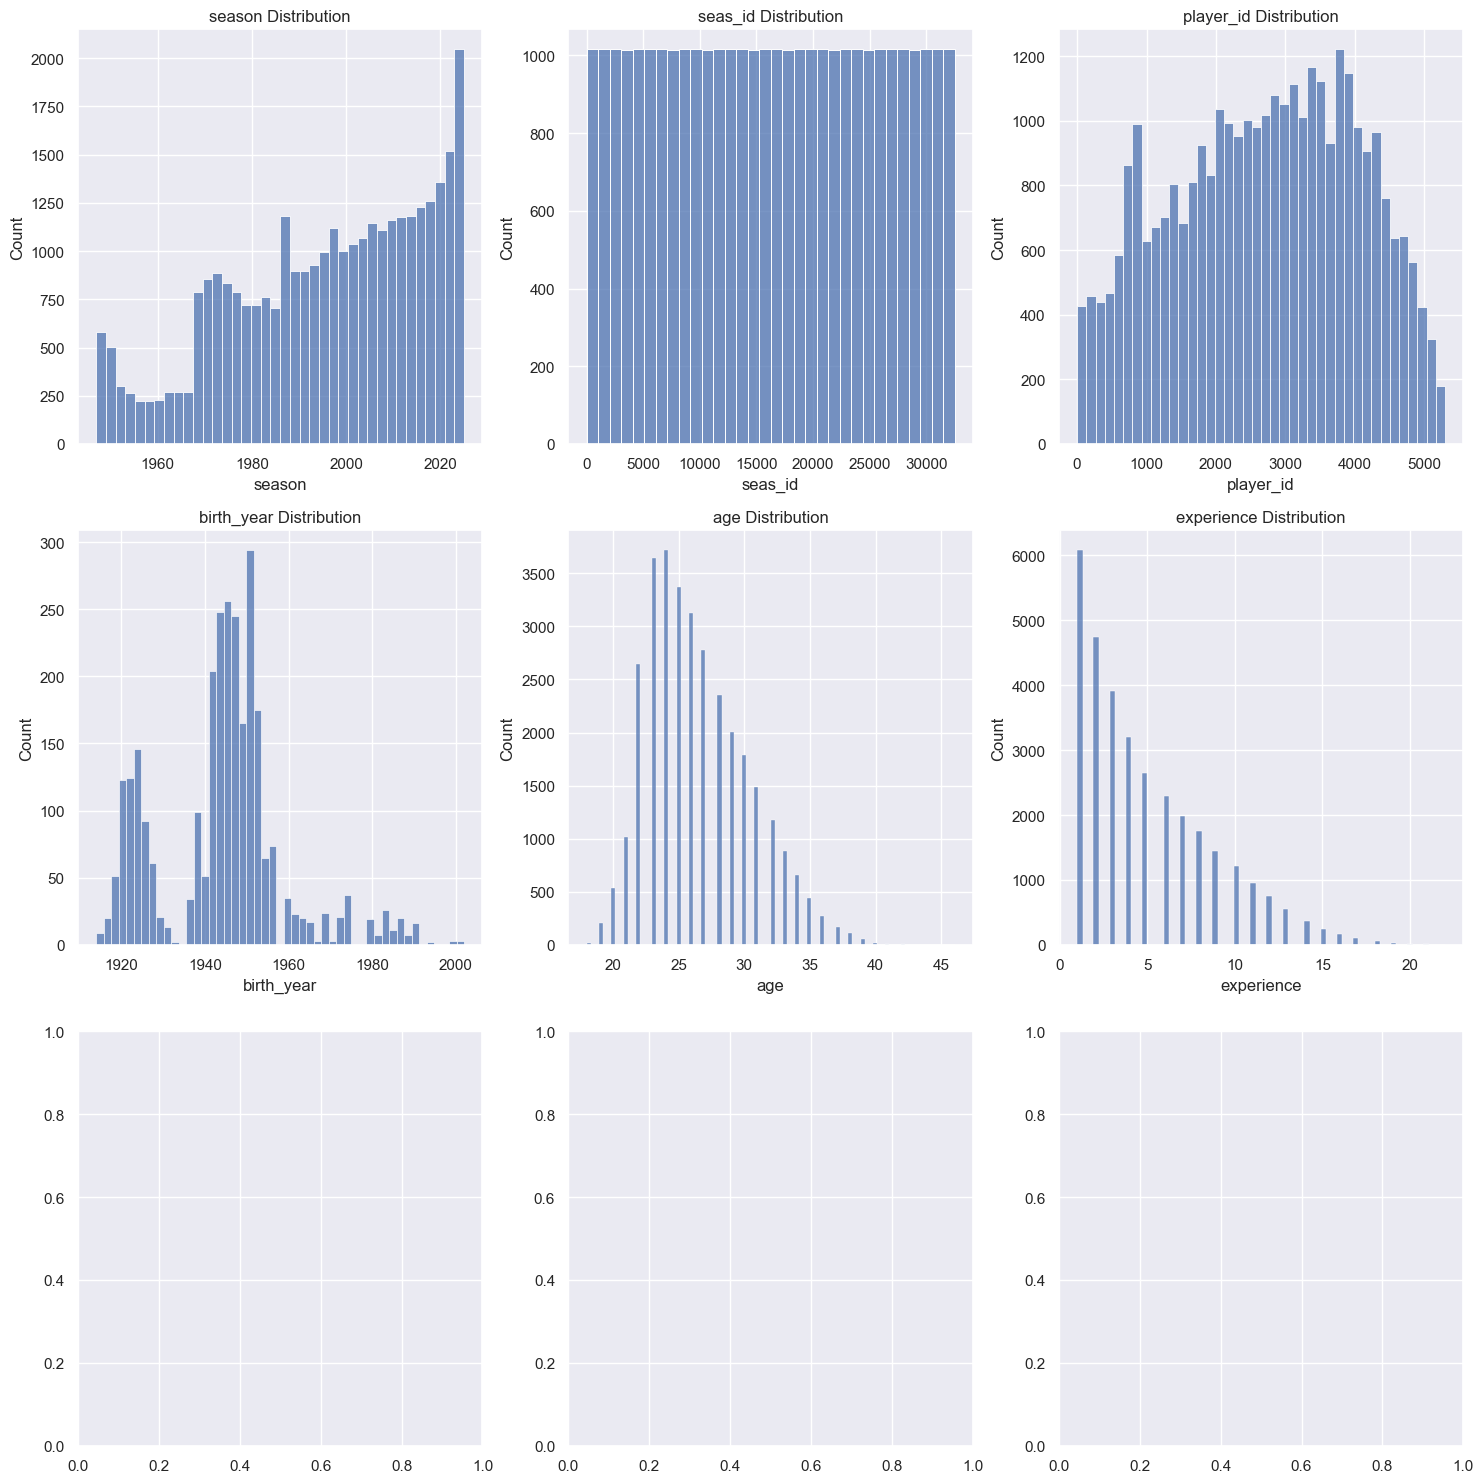

In [9]:
# Analyze numeric feature distributions
numeric_cols = ps_df_processed.select_dtypes(include=[np.number]).columns

# Create distribution plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols[:9]):  # Plot first 9 features
    sns.histplot(data=ps_df_processed, x=col, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### Feature Correlation Analysis

Examine correlations between features to inform dimensionality reduction.

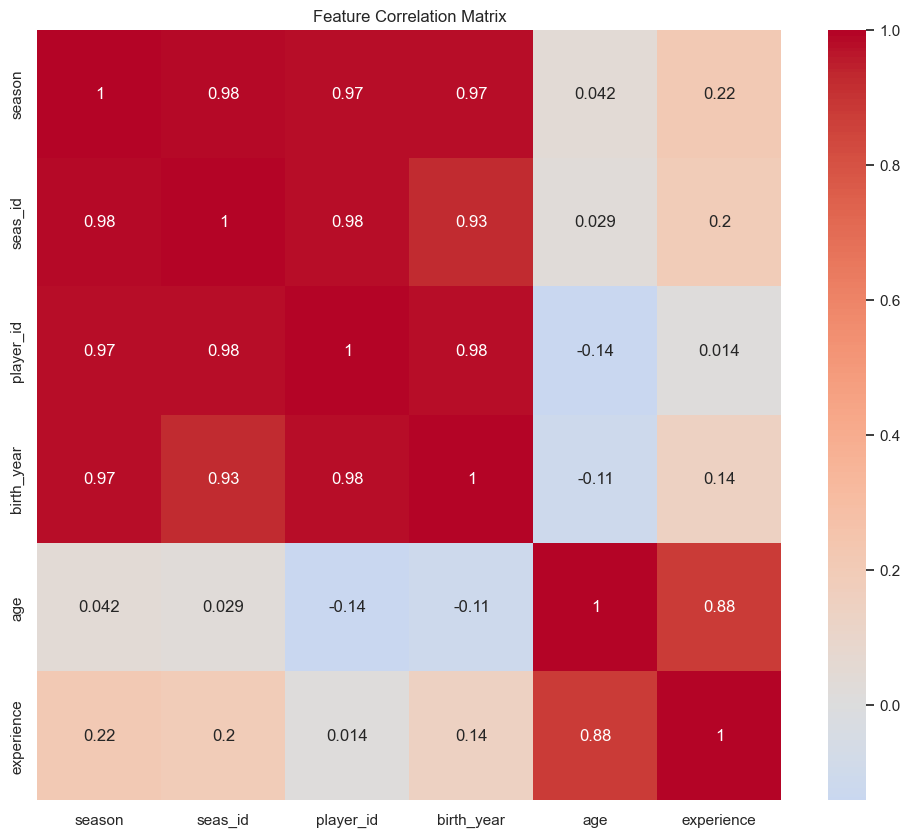

In [10]:
# Create correlation matrix
corr_matrix = ps_df_processed.select_dtypes(include=[np.number]).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## Clean Team Statistics Data

Process team statistics with focus on preparing features for clustering and pattern analysis.

In [11]:
# [Previous team statistics cleaning code remains the same]
# Load and clean team stats data
logger.info("Loading team stats data...")
ts_df_raw = pd.read_csv('../data/raw/kaggle/sumitrodatta/nba-aba-baa-stats/Team Stats Per Game.csv')
logger.info(f"Initial team stats records: {len(ts_df_raw):,}")

# [Rest of the team statistics cleaning code remains the same]

2025-02-23 11:23:15 - INFO - Loading team stats data...
2025-02-23 11:23:15 - INFO - Initial team stats records: 1,876


## Clean Injury Data

Process injury data to identify patterns in team health and availability.

In [12]:
# [Previous injury data cleaning code remains the same]
# Load and clean injury data
logger.info("Loading player injury data...")
injury_df_raw = pd.read_csv('../data/raw/kaggle/loganlauton/nba-injury-stats-1951-2023/NBA Player Injury Stats(1951 - 2023).csv')
logger.info(f"Initial player injury records: {len(injury_df_raw):,}")

# [Rest of the injury data cleaning code remains the same]

2025-02-23 11:23:16 - INFO - Loading player injury data...
2025-02-23 11:23:16 - INFO - Initial player injury records: 37,667


## Conclusions

The data cleaning process has prepared our datasets for unsupervised learning analysis:

1. **Data Quality**
   - Standardized team names and conference mappings
   - Handled missing values to ensure robust clustering
   - Prepared numeric features for distance-based algorithms

2. **Feature Analysis**
   - Identified correlations between features
   - Examined feature distributions
   - Prepared data for dimensionality reduction

3. **Pattern Discovery Preparation**
   - Created consistent feature sets for clustering
   - Prepared injury patterns for analysis
   - Ensured data quality for anomaly detection

### Next Steps

The cleaned datasets will be used for:
- Clustering analysis to identify team archetypes
- Dimensionality reduction to visualize team relationships
- Anomaly detection to identify unusual team performances